<a href="https://colab.research.google.com/github/surajghuwalewala/CE888_Data_Science_and_Decision_Making/blob/master/tf_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [1]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'


Cloning into 'COVID-CT'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 5459 (delta 8), reused 0 (delta 0), pack-reused 5443
Receiving objects: 100% (5459/5459), 1.09 GiB | 15.44 MiB/s, done.
Resolving deltas: 100% (363/363), done.
Checking out files: 100% (1048/1048), done.


In [2]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid P cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid N cases: ", count)


Covid P cases:  348
Covid N cases:  396


In [0]:
base_dir = '/content/covid19_CT'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
if not os.path.exists(train_covid_dir):os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
if not os.path.exists(train_noncovid_dir):os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
if not os.path.exists(validation_covid_dir):os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
if not os.path.exists(validation_noncovid_dir):os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
if not os.path.exists(test_covid_dir):os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
if not os.path.exists(test_noncovid_dir):os.mkdir(test_noncovid_dir)

In [0]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)
    


In [0]:
fnames = ['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 250
total validation Covid images: 50
total validation NonCovid images: 50
total test Covid images: 48
total test NonCovid images: 48


In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

IMG_SIZE = 224

train_generator = datagen.flow_from_directory(train_dir,
                                                    target_size=(IMG_SIZE, IMG_SIZE), 
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = datagen.flow_from_directory(validation_dir,
                                                        target_size=(IMG_SIZE, IMG_SIZE),
                                                        batch_size=100,
                                                        class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=100,
                                                    class_mode='binary')

Using TensorFlow backend.


Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [0]:
## VGG 16

from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

In [0]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [11]:

model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

574717952/574710816 [==============================] - 15s 0us/step


In [12]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(1, activation='sigmoid', name='output')(last_layer)  ## 2 classes
custom_vgg_model = Model(img_input, out)
custom_vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[-1].trainable
custom_vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:

custom_vgg_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=3),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [17]:
history = custom_vgg_model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10,
                              callbacks=my_callbacks)

Epoch 1/20
100/100 [==============================] - 79s 791ms/step - loss: 0.6233 - acc: 0.6664 - val_loss: 0.5636 - val_acc: 0.7100
Epoch 2/20
100/100 [==============================] - 83s 832ms/step - loss: 0.5299 - acc: 0.7697 - val_loss: 0.5169 - val_acc: 0.7800
Epoch 3/20
100/100 [==============================] - 82s 824ms/step - loss: 0.4977 - acc: 0.7858 - val_loss: 0.5087 - val_acc: 0.7800
Epoch 4/20
100/100 [==============================] - 81s 807ms/step - loss: 0.4642 - acc: 0.8144 - val_loss: 0.4859 - val_acc: 0.8000
Epoch 5/20
100/100 [==============================] - 80s 796ms/step - loss: 0.4423 - acc: 0.8279 - val_loss: 0.4944 - val_acc: 0.7600
Epoch 6/20
100/100 [==============================] - 81s 808ms/step - loss: 0.4282 - acc: 0.8312 - val_loss: 0.4706 - val_acc: 0.7700
Epoch 7/20
100/100 [==============================] - 79s 790ms/step - loss: 0.4110 - acc: 0.8428 - val_loss: 0.4753 - val_acc: 0.8000
Epoch 8/20
100/100 [==============================] - 7

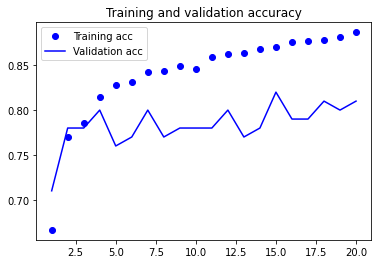

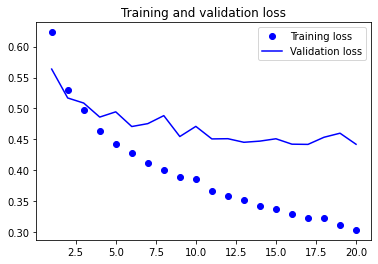

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [19]:
##EVALUATION
from sklearn.metrics import accuracy_score

## Test Accuracy
y_true = test_generator.classes
predictions = custom_vgg_model.predict(test_generator, steps=1 )
y_pred = predictions > 0.5
test_acc = accuracy_score(y_true, y_pred)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 0.8867999911308289
Val Accuracy:	 0.8100000023841858
Test Accuracy:	 0.4791666666666667
Precision:	 0.4782608695652174
Recall:		 0.4583333333333333
F1 Score:	 0.4680851063829787
